In [72]:
import requests
import networkx as nx
from typing import TypeAlias
import matplotlib.pyplot as plt
from staticmap import StaticMap, CircleMarker, Line

BusesGraph: TypeAlias = nx.Graph

class Bus:
    def __init__(self, id, name, line):
        self.id = id
        self.name = name
        self.line = line


def get_buses_graph() -> BusesGraph:
    url = "https://www.ambmobilitat.cat/OpenData/ObtenirDadesAMB.json"
    response = requests.get(url)
    data = response.json()

    graph = BusesGraph()

    for line in data['ObtenirDadesAMBResult']['Linies']['Linia']:
        for stop in line['Parades']['Parada']:
            bus = Bus(stop['CodAMB'], stop['Nom'], line['Nom'])
            graph.add_node(bus.id, name=bus.name, line=bus.line, x=stop['UTM_X'], y=stop['UTM_Y'])

        stops = line['Parades']['Parada']
        for i in range(len(stops) - 1):
            graph.add_edge(stops[i]['CodAMB'], stops[i + 1]['CodAMB'])

    return graph

def show(g: BusesGraph) -> None:
    plt.figure(figsize=(10,10))
    nx.draw(g, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray')
    plt.show()

def plot(g: BusesGraph, file_name: str) -> None:
    m = StaticMap(800, 800)

    for node in g.nodes(data=True):
        #node: (72, {'name': 'Pl de Catalunya', 'line': '100', 'x': 41.386255, 'y': 2.169782})
        marker = CircleMarker((node[1]['y'], node[1]['x']), 'red', 10)
        m.add_marker(marker)



    for edge in g.edges():
        #edge:
        #(72, 72)
        #(73, 73)
        #(72, 72)
        #(73, 73)
        #(74, 74)
        #(76, 76)
        #(79, 79)
        #...
        line = Line(((g.nodes[edge[0]]['y'], g.nodes[edge[0]]['x']), (g.nodes[edge[1]]['y'], g.nodes[edge[1]]['x'])), 'blue', 3)
        m.add_line(line)

    image = m.render()
    image.save(file_name)


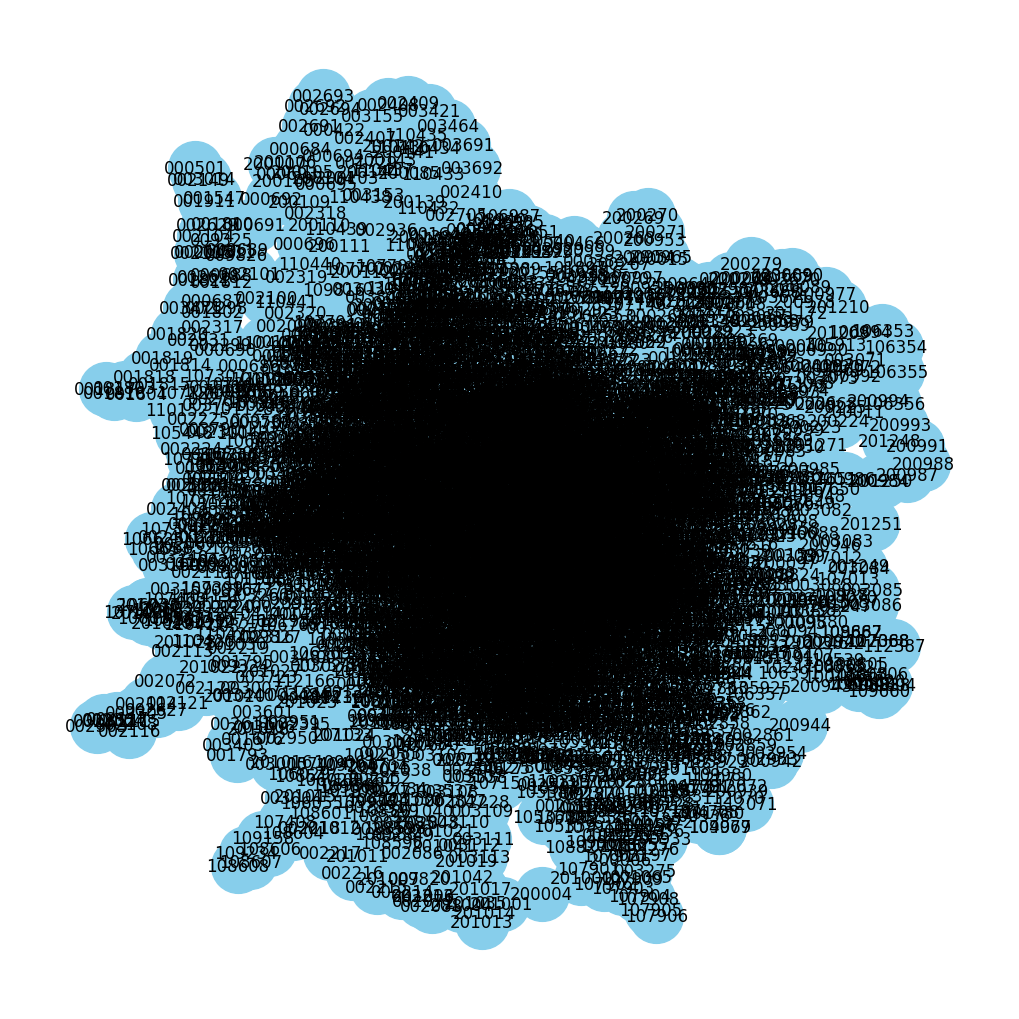

('001797', '003259')
('001797', '003812')
('003259', '001674')
('003259', '001673')
('003259', '003260')
('001674', '001798')
('001798', '003139')
('003139', '001683')
('001683', '002612')
('002612', '001678')
('001678', '002534')
('002534', '001679')
('001679', '002615')
('002615', '001680')
('001680', '002614')
('002614', '002587')
('002587', '001681')
('001681', '001687')
('001681', '106164')
('001681', '000252')
('001681', '002618')
('001687', '002613')
('002613', '110365')
('110365', '003811')
('110365', '000413')
('110365', '003629')
('003811', '003812')
('001673', '003278')
('003260', '002316')
('002316', '003723')
('003723', '003601')
('003601', '001676')
('001676', '001793')
('001793', '003403')
('003403', '002611')
('002611', '003440')
('003440', '001795')
('001795', '003278')
('000411', '002234')
('000411', '000727')
('002234', '002235')
('002234', '000371')
('002234', '107229')
('002234', '000475')
('002235', '000476')
('002235', '003633')
('002235', '002233')
('000476', '0